In [ ]:
# atsisiųskite visus 
#  duomenis iš 
# https://data.gov.lt/datasets/509/
# 
# Užduotys:
# nuskaitykite visus failus į pandas DF (vienas DF vienam failui)
# Suraskite ir pateikite kitimą kas metus šių kriterijų:
# Dalyvių kiekis kiekvienais metais
# Apgadintų TP kiekis kas metus
# Žuvusių kiekis kiekvienais metais
#  Sužeistų kiekis kiekvienais metais
# Neblaivių bei apsvaigusių kaltininkų kiekio kaita kas metus
# Suraskite 3 populiariausias eismo įvykių schemas! 2023 metais (stulpelis schema2)
# ir pavaizduokite kitimą kas metus.
#  parodykite, kaip kito vyrų, moterų sukeltų EI kiekiai kas metus.
# parodykite, kaip kito neblaivių vyrų, moterų sukeltų EI kiekiai kas metus


# Kad būtų ką veikti - jei viską nuskaitysite taip paprastai į DF - python naudos ~ 3GB RAM.
# Pagalvokite, ką galima ir kur optimizuoti.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import glob

In [8]:
failai=[]
for name in glob.glob(r'C:\Users\pauli\Downloads\*.json'):
    failai.append(name)

In [16]:
df=[]
for i in failai:
    df.append(pd.read_json(i))

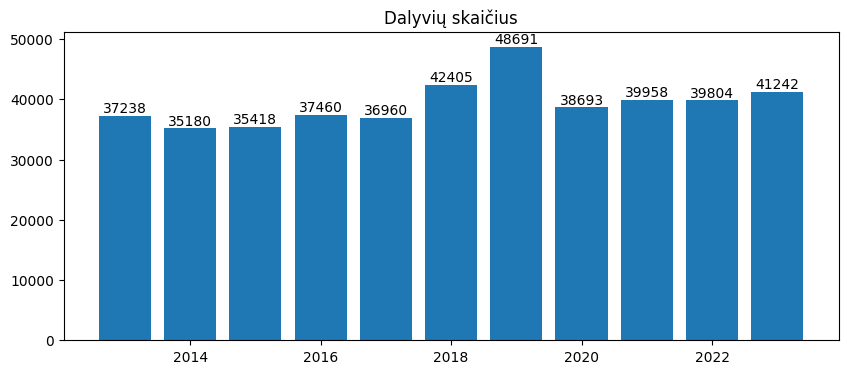

In [41]:
metai=[]
for i in range(2013, 2024):
    metai.append(i)
    
dalyviuskaicius=[]
for i in df:
    dalyviuskaicius.append(i['dalyviuSkaicius'].sum())

fig, axis = plt.subplots(figsize=(10, 4))

a=axis.bar(metai, dalyviuskaicius)
axis.bar_label(a)
plt.title('Dalyvių skaičius')

plt.show()


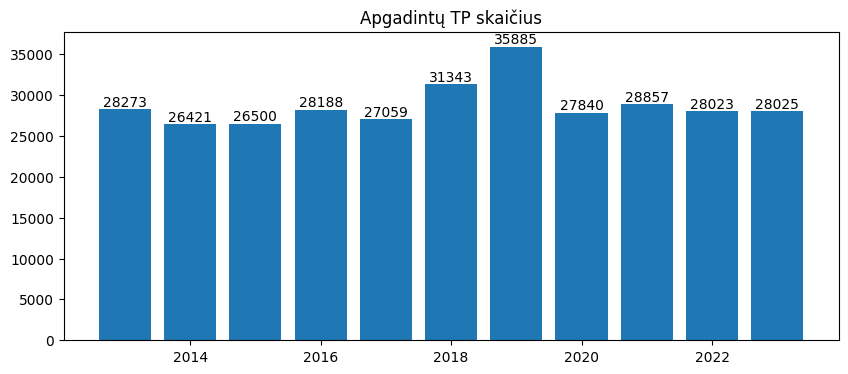

In [78]:


apgadintos=[]
for i in df:
    apgadintos.append(i['apgadintuTpSkaicius'].sum())
    
fig, axis = plt.subplots(figsize=(10, 4))

a=axis.bar(metai, apgadintos)
axis.bar_label(a)
plt.title('Apgadintų TP skaičius')

plt.show()


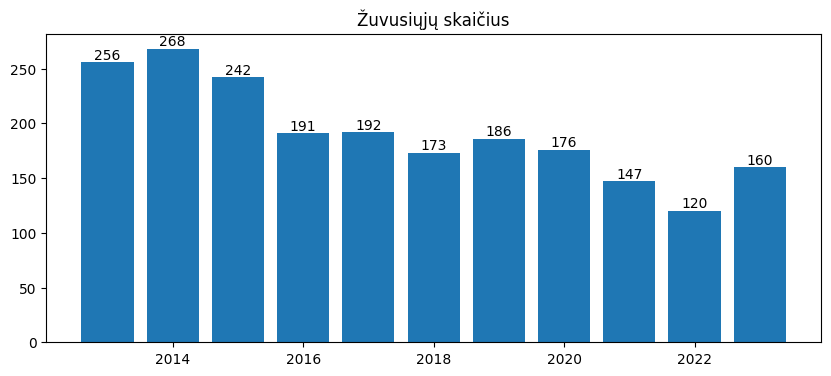

In [79]:
zuvo=[]
for i in df:
    zuvo.append(i['zuvusiuSkaicius'].sum())
    
fig, axis = plt.subplots(figsize=(10, 4))

a=axis.bar(metai, zuvo)
axis.bar_label(a)
plt.title('Žuvusiųjų skaičius')

plt.show()

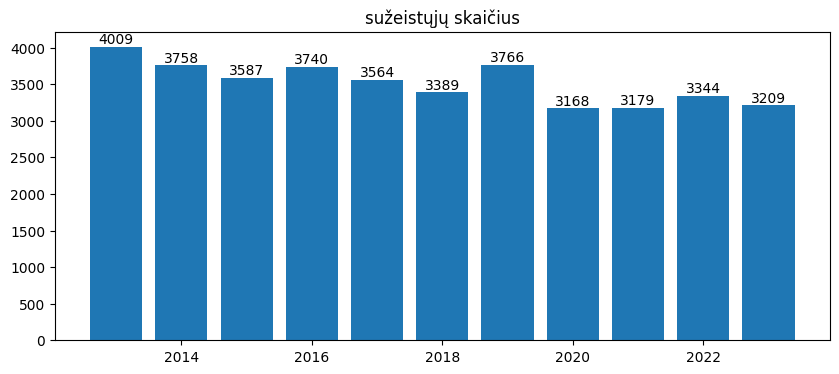

In [80]:
suzeisti=[]
for i in df:
    suzeisti.append(i['suzeistuSkaicius'].sum())
    
fig, axis = plt.subplots(figsize=(10, 4))

a=axis.bar(metai, suzeisti)
axis.bar_label(a)
plt.title('sužeistųjų skaičius')

plt.show()

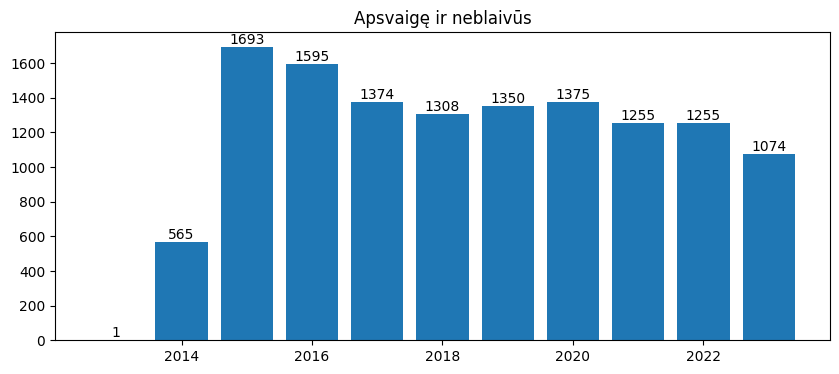

In [129]:

neblaivus=[]
for i in df:
    a=0
    for j in i['neblaivusKaltininkai']:
        if j == 'Taip':
            a=a+1
    for j in i['apsvaigeKaltininkai']:
        if j == 'Taip':
            a=a+1
    neblaivus.append(a)

fig, axis = plt.subplots(figsize=(10, 4))

a=axis.bar(metai, neblaivus)
axis.bar_label(a)
plt.title('Apsvaigę ir neblaivūs')

plt.show()

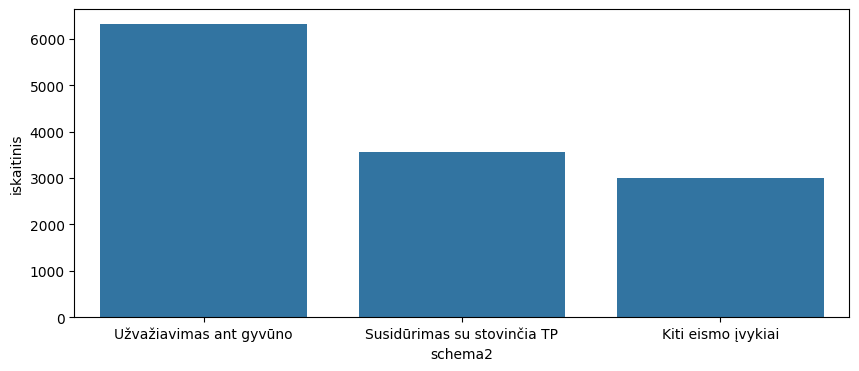

In [126]:
schemos2023 = df[10][['schema2', 'iskaitinis']].groupby('schema2').count().reset_index().sort_values(by='iskaitinis', ascending=False)[:3]


fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=schemos2023, x = 'schema2', y='iskaitinis')

plt.show()

[3367, 3259, 3485, 3573, 3426, 3987, 4191, 3024, 3076, 3127, 2889]
[11933, 11634, 11431, 11895, 11187, 12011, 13115, 10124, 10501, 9842, 9173]


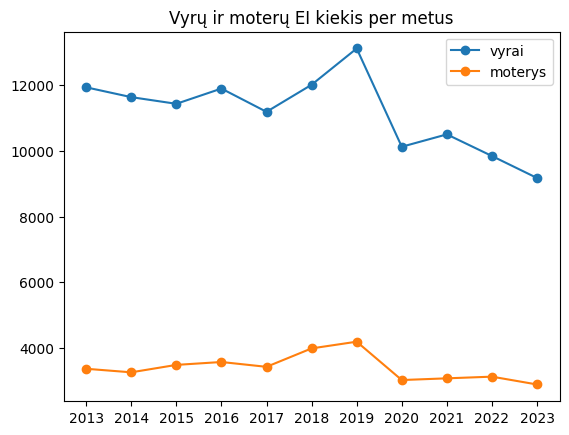

In [140]:
motskaicius=[]
vyrskaicius=[]

for i in df:
    mot=0
    vyr=0
    for j in i['eismoDalyviai']:
        for m in j:
            if m['kaltininkas'] == 'Taip':
                if m['lytis']=='Vyras':
                    vyr = vyr+1
                if m['lytis']=='Moteris':
                    mot = mot+1
                    
    motskaicius.append(mot)
    vyrskaicius.append(vyr)
    

print(motskaicius)
print(vyrskaicius)

fig, axis = plt.subplots()

axis.plot(metai, vyrskaicius, label = 'vyrai', marker ='o')
axis.plot(metai, motskaicius, label = 'moterys', marker ='o')
axis.set_xticks(metai)
axis.legend(loc='best')
plt.title('Vyrų ir moterų EI kiekis per metus')
plt.show()

[3367, 3259, 3485, 3573, 3426, 3987, 4191, 3024, 3076, 3127, 2889]
[11933, 11634, 11431, 11895, 11187, 12011, 13115, 10124, 10501, 9842, 9173]


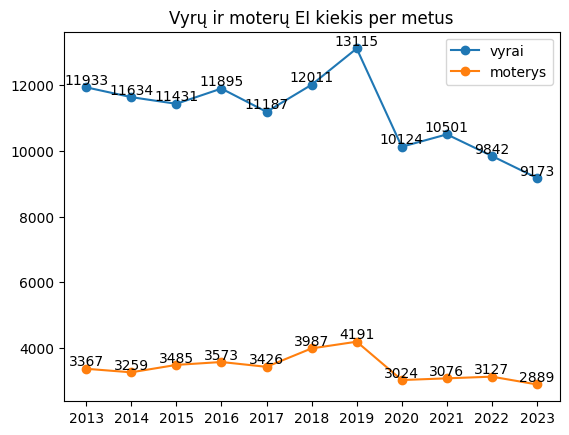

In [141]:
motskaicius = []
vyrskaicius = []

for i in df:
    mot = 0
    vyr = 0
    for j in i['eismoDalyviai']:
        for m in j:
            if m['kaltininkas'] == 'Taip':
                if m['lytis'] == 'Vyras':
                    vyr = vyr + 1
                if m['lytis'] == 'Moteris':
                    mot = mot + 1

    motskaicius.append(mot)
    vyrskaicius.append(vyr)

print(motskaicius)
print(vyrskaicius)

fig, axis = plt.subplots()

axis.plot(metai, vyrskaicius, label='vyrai', marker='o')
axis.plot(metai, motskaicius, label='moterys', marker='o')

# Annotate values over markers
for i, value in enumerate(vyrskaicius):
    axis.text(metai[i], vyrskaicius[i], str(value), ha='center', va='bottom')

for i, value in enumerate(motskaicius):
    axis.text(metai[i], motskaicius[i], str(value), ha='center', va='bottom')

axis.set_xticks(metai)
axis.legend(loc='best')
plt.title('Vyrų ir moterų EI kiekis per metus')
plt.show()

In [ ]:
motskaicius=[]
vyrskaicius=[]

for i in df:
    mot=0
    vyr=0
    for j, j1 in zip(i['eismoDalyviai'], i['neblaivusKaltininkai']):
        for m in j:
            if m['kaltininkas'] == 'Taip':
                if m['lytis']=='Vyras':
                    vyr = vyr+1
                if m['lytis']=='Moteris':
                    mot = mot+1
                    
    motskaicius.append(mot)
    vyrskaicius.append(vyr)
    

print(motskaicius)
print(vyrskaicius)

fig, axis = plt.subplots()

axis.plot(metai, vyrskaicius, label = 'vyrai', marker ='o')
axis.plot(metai, motskaicius, label = 'moterys', marker ='o')
axis.set_xticks(metai)
axis.legend(loc='best')
plt.title('Vyrų ir moterų EI kiekis per metus')
plt.show()

[1, 53, 209, 172, 147, 146, 137, 170, 163, 158, 125]
[0, 521, 1534, 1436, 1243, 1159, 1224, 1222, 1101, 1099, 956]


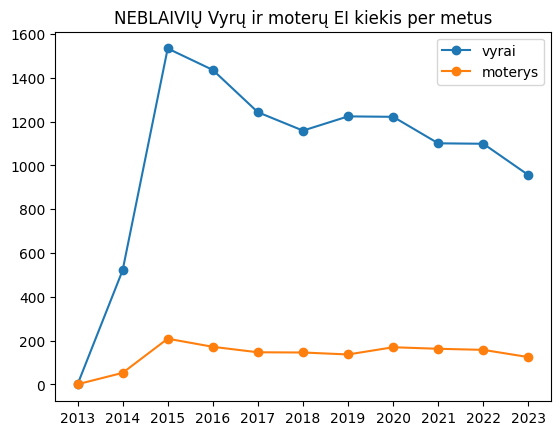

In [151]:
df1=[]
for i in range(0, len(df)):
    df1.append(df[i][df[i]['neblaivusKaltininkai'] == 'Taip'])

motskaicius=[]
vyrskaicius=[]

for i in df1:
    mot=0
    vyr=0
    for j in i['eismoDalyviai']:
        for m in j:
            if m['kaltininkas'] == 'Taip':
                if m['lytis']=='Vyras':
                    vyr = vyr+1
                if m['lytis']=='Moteris':
                    mot = mot+1
                    
    motskaicius.append(mot)
    vyrskaicius.append(vyr)
    

print(motskaicius)
print(vyrskaicius)

fig, axis = plt.subplots()

axis.plot(metai, vyrskaicius, label = 'vyrai', marker ='o')
axis.plot(metai, motskaicius, label = 'moterys', marker ='o')
axis.set_xticks(metai)
axis.legend(loc='best')
plt.title('NEBLAIVIŲ Vyrų ir moterų EI kiekis per metus')
plt.show()

In [87]:
df[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20430 entries, 0 to 20429
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   registrokodas                 20430 non-null  object 
 1   dataLaikas                    20430 non-null  object 
 2   registravimoData              20430 non-null  object 
 3   paskutinioRedagavimoLaikas    20184 non-null  object 
 4   iskaitinis                    20430 non-null  int64  
 5   rusis                         20183 non-null  object 
 6   schema1                       20183 non-null  object 
 7   schema2                       20183 non-null  object 
 8   dalyviuSkaicius               20183 non-null  float64
 9   zuvusiuSkaicius               20430 non-null  int64  
 10  zuvVaiku                      6363 non-null   float64
 11  suzeistuSkaicius              20430 non-null  int64  
 12  suzeistaVaiku                 6363 non-null   float64
 13  t

In [110]:
la=df[2]